## Importing the Dependencies

In [133]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import warnings
warnings.filterwarnings(action='ignore')

## Defining Utility Functions

In [134]:
def get_clf_eval(y_test, y_pred=None, y_pred_prob=None):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

    return confusion

## Loading the Dataset

In [135]:
df = pd.read_csv('diabetes.csv')

In [136]:
df.shape

(768, 9)

In [137]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [138]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

'DiabetesPedigreeFunction' is a long name, let's change to DPF

In [139]:
df.rename(columns={'DiabetesPedigreeFunction': 'DPF'}, inplace=True)

## EDA

### Dealing with Missing Values

In [140]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [141]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace({0, np.NaN})

In [142]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [143]:
import missingno

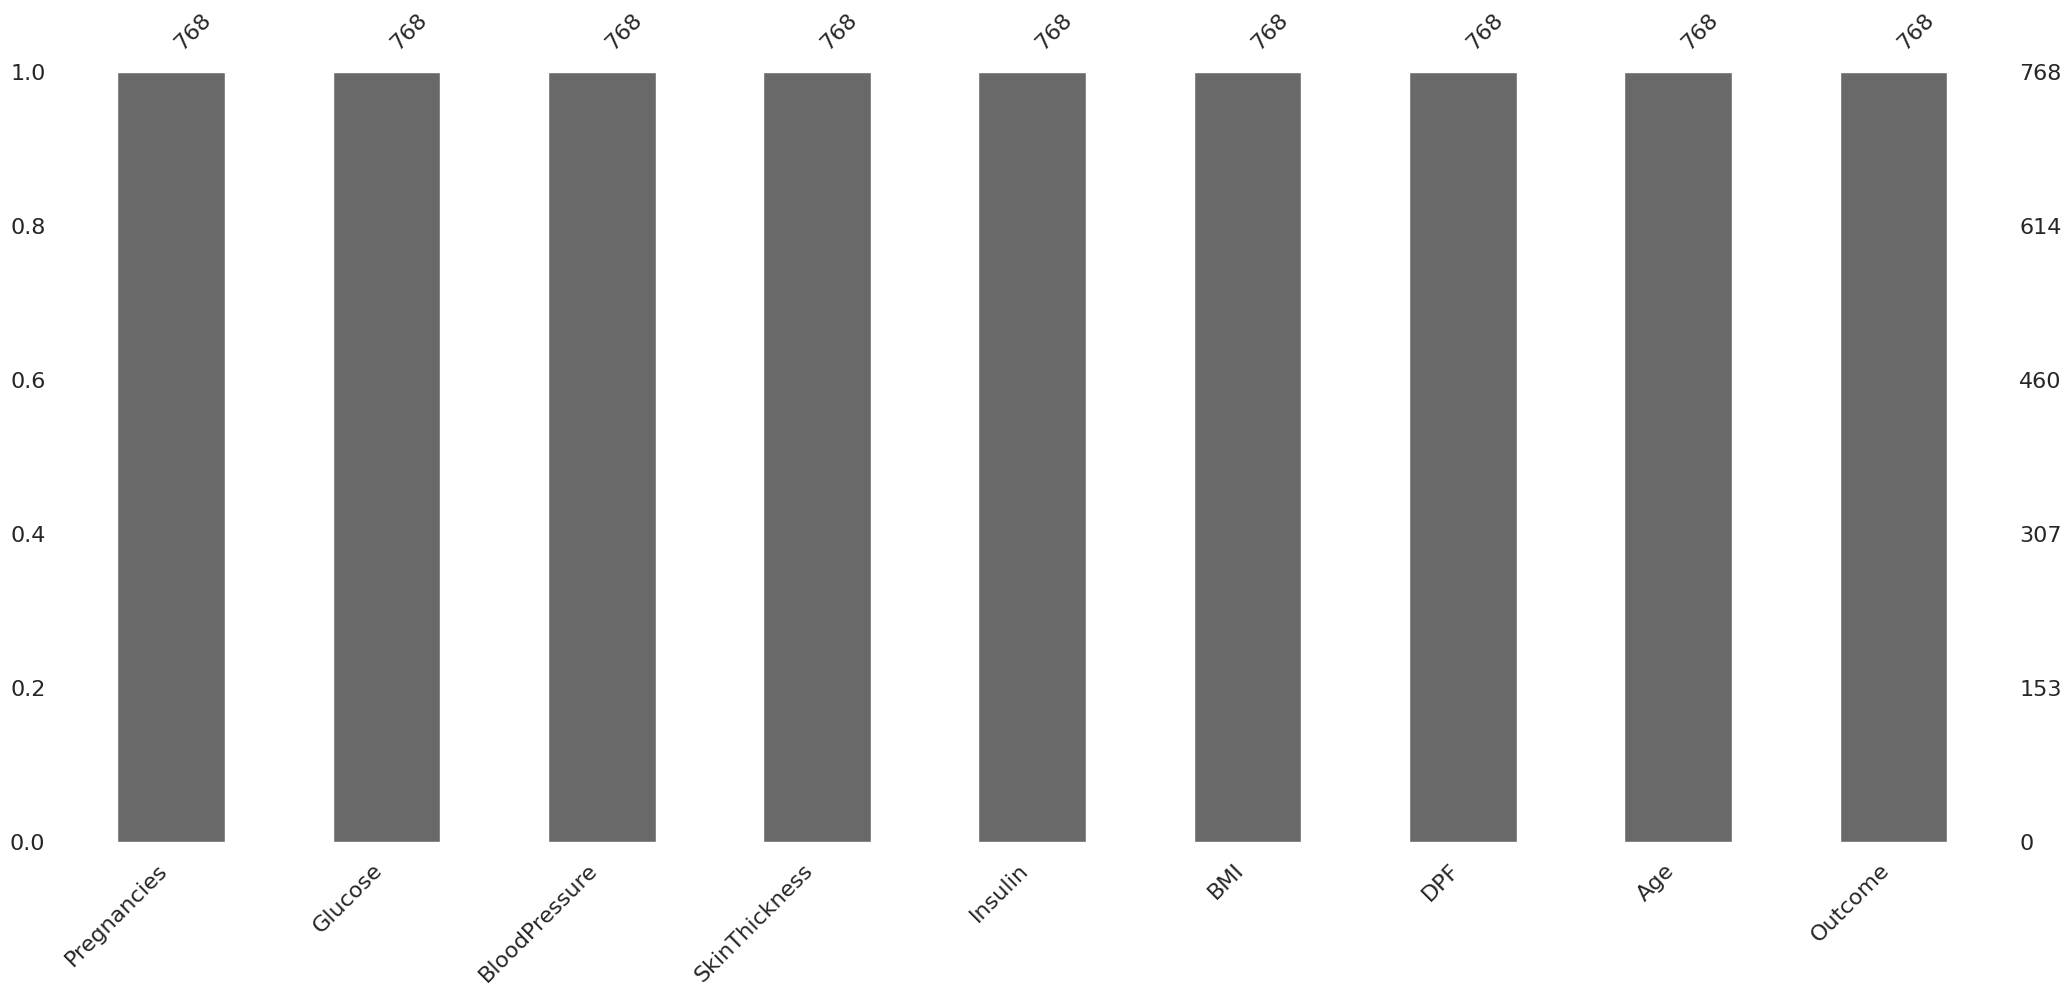

In [144]:
missingno.bar(df)
plt.show()

## Checking Target Imbalance

In [145]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [146]:
value_counts = df['Outcome'].value_counts()

In [147]:
df['Outcome'].value_counts() / len(df) * 100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

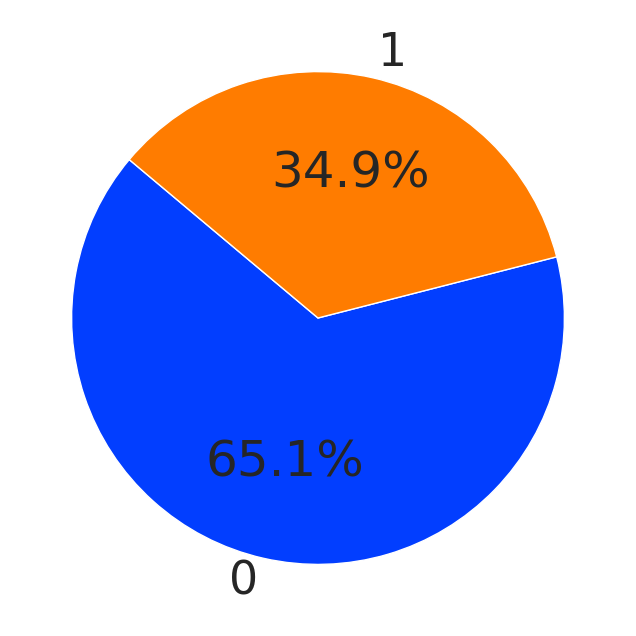

In [148]:
categories = [0, 1]
values = [count for count in value_counts]

plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140)

plt.show()

The target is well balanced in this case

## Checking Statistics

In [149]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI         DPF         Age     Outcome  
count  768.000000  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885    0.348958  
std      7.884160    0.331329   11.760232    0.476951  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.300000    0.243750   24.000000    0.000000  
50%     32.000000    0.372500   29.000000    0.000000  
75%     36.600000    0.626250   41.000000    1.000000  
max     67.100000    2.420000   81.000000    1.000000

In [150]:
df.describe([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
10%       0.000000   85.000000      54.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
90%       9.000000  167.000000      88.000000      40.000000  210.000000   
95%      10.000000  181.000000      90.000000      44.000000  293.000000   
99%      13.000000  196.000000     106.000000      51.330000  519.900000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI         DPF         Age     Outcome  
count  768.000000  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885    0.348958  
std      7.884160    0.331329   11.760232    0.476951  
min      0.000000    0.078000   21.000000    0.000000  
10%     23.600000    0.165000   22.000000    0.000000  
25%     27.300000    0.243750   24.000000    0.000000  
50%     32.000000    0.372500   29.000000    0.000000  
75%     36.600000    0.626250   41.000000    1.000000  
90%     41.500000    0.878600   51.000000    1.000000  
95%     44.395000    1.132850   58.000000    1.000000  
99%     50.759000    1.698330   67.000000    1.000000  
max     67.100000    2.420000   81.000000    1.000000

Many features have data points with values 0, they need to be looked into further

## Checking and Removing Outliers

In [151]:
df.loc[:, :'Age'].columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age'],
      dtype='object')

In [152]:
feature_names = [cname for cname in df.loc[:, :'Age'].columns]

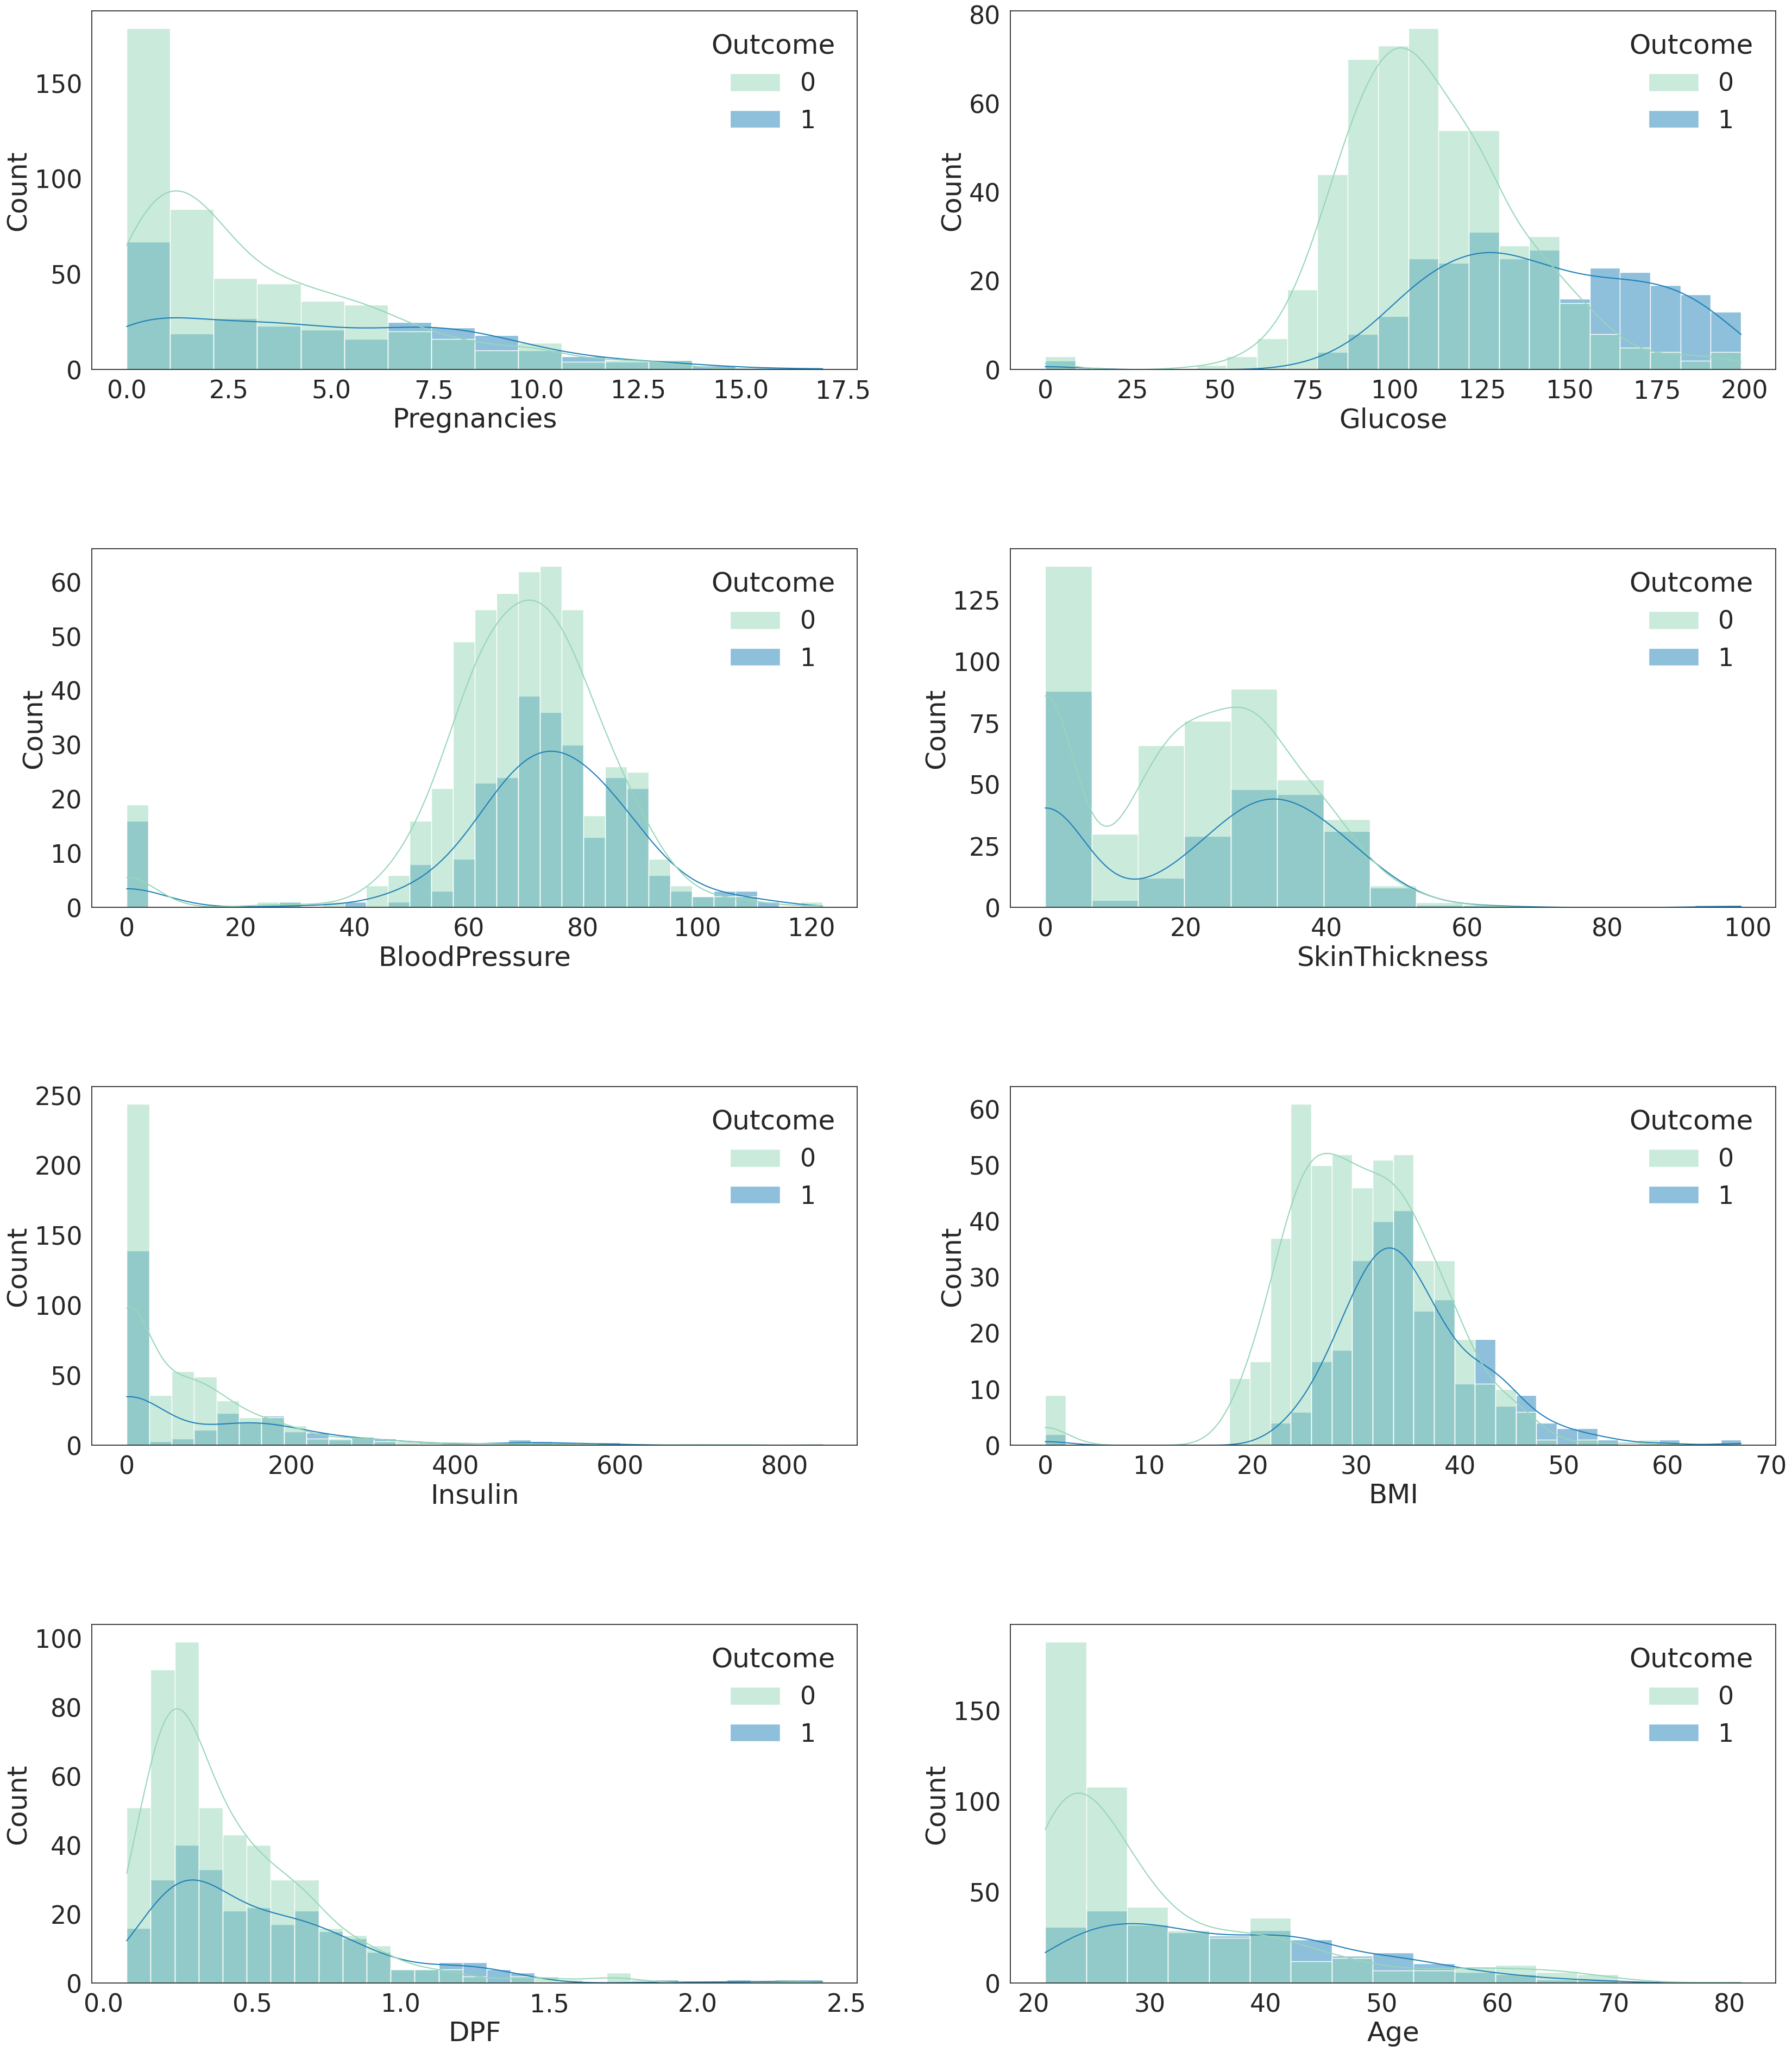

In [153]:
rcParams['figure.figsize'] = 40,60
sns.set(font_scale = 3)
sns.set_style('white')
sns.set_palette('bright')
plt.subplots_adjust(hspace=0.5)
i = 1
for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=df, x=name, hue='Outcome',kde=True,palette='YlGnBu')
    i += 1

Many features seem to have 0 values. Let's check the proportion of zero values in those features

In [154]:
zero_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for feature in zero_features:
    print('{} has {} 0-values ({:.2f}%)'.format(feature, (df[feature] == 0).sum(), (df[feature] == 0).sum() / len(df) * 100))

Pregnancies has 111 0-values (14.45%)
Glucose has 5 0-values (0.65%)
BloodPressure has 35 0-values (4.56%)
SkinThickness has 227 0-values (29.56%)
Insulin has 374 0-values (48.70%)
BMI has 11 0-values (1.43%)


Insulin and SkinThickness have a significant percentage of 0-values. However, 0 pregnancies does make sense. That can't be said about the other zero_features

In [155]:
zero_features.pop(0)

'Pregnancies'

In [156]:
df[zero_features] = df[zero_features].replace(0, df[zero_features].mean())

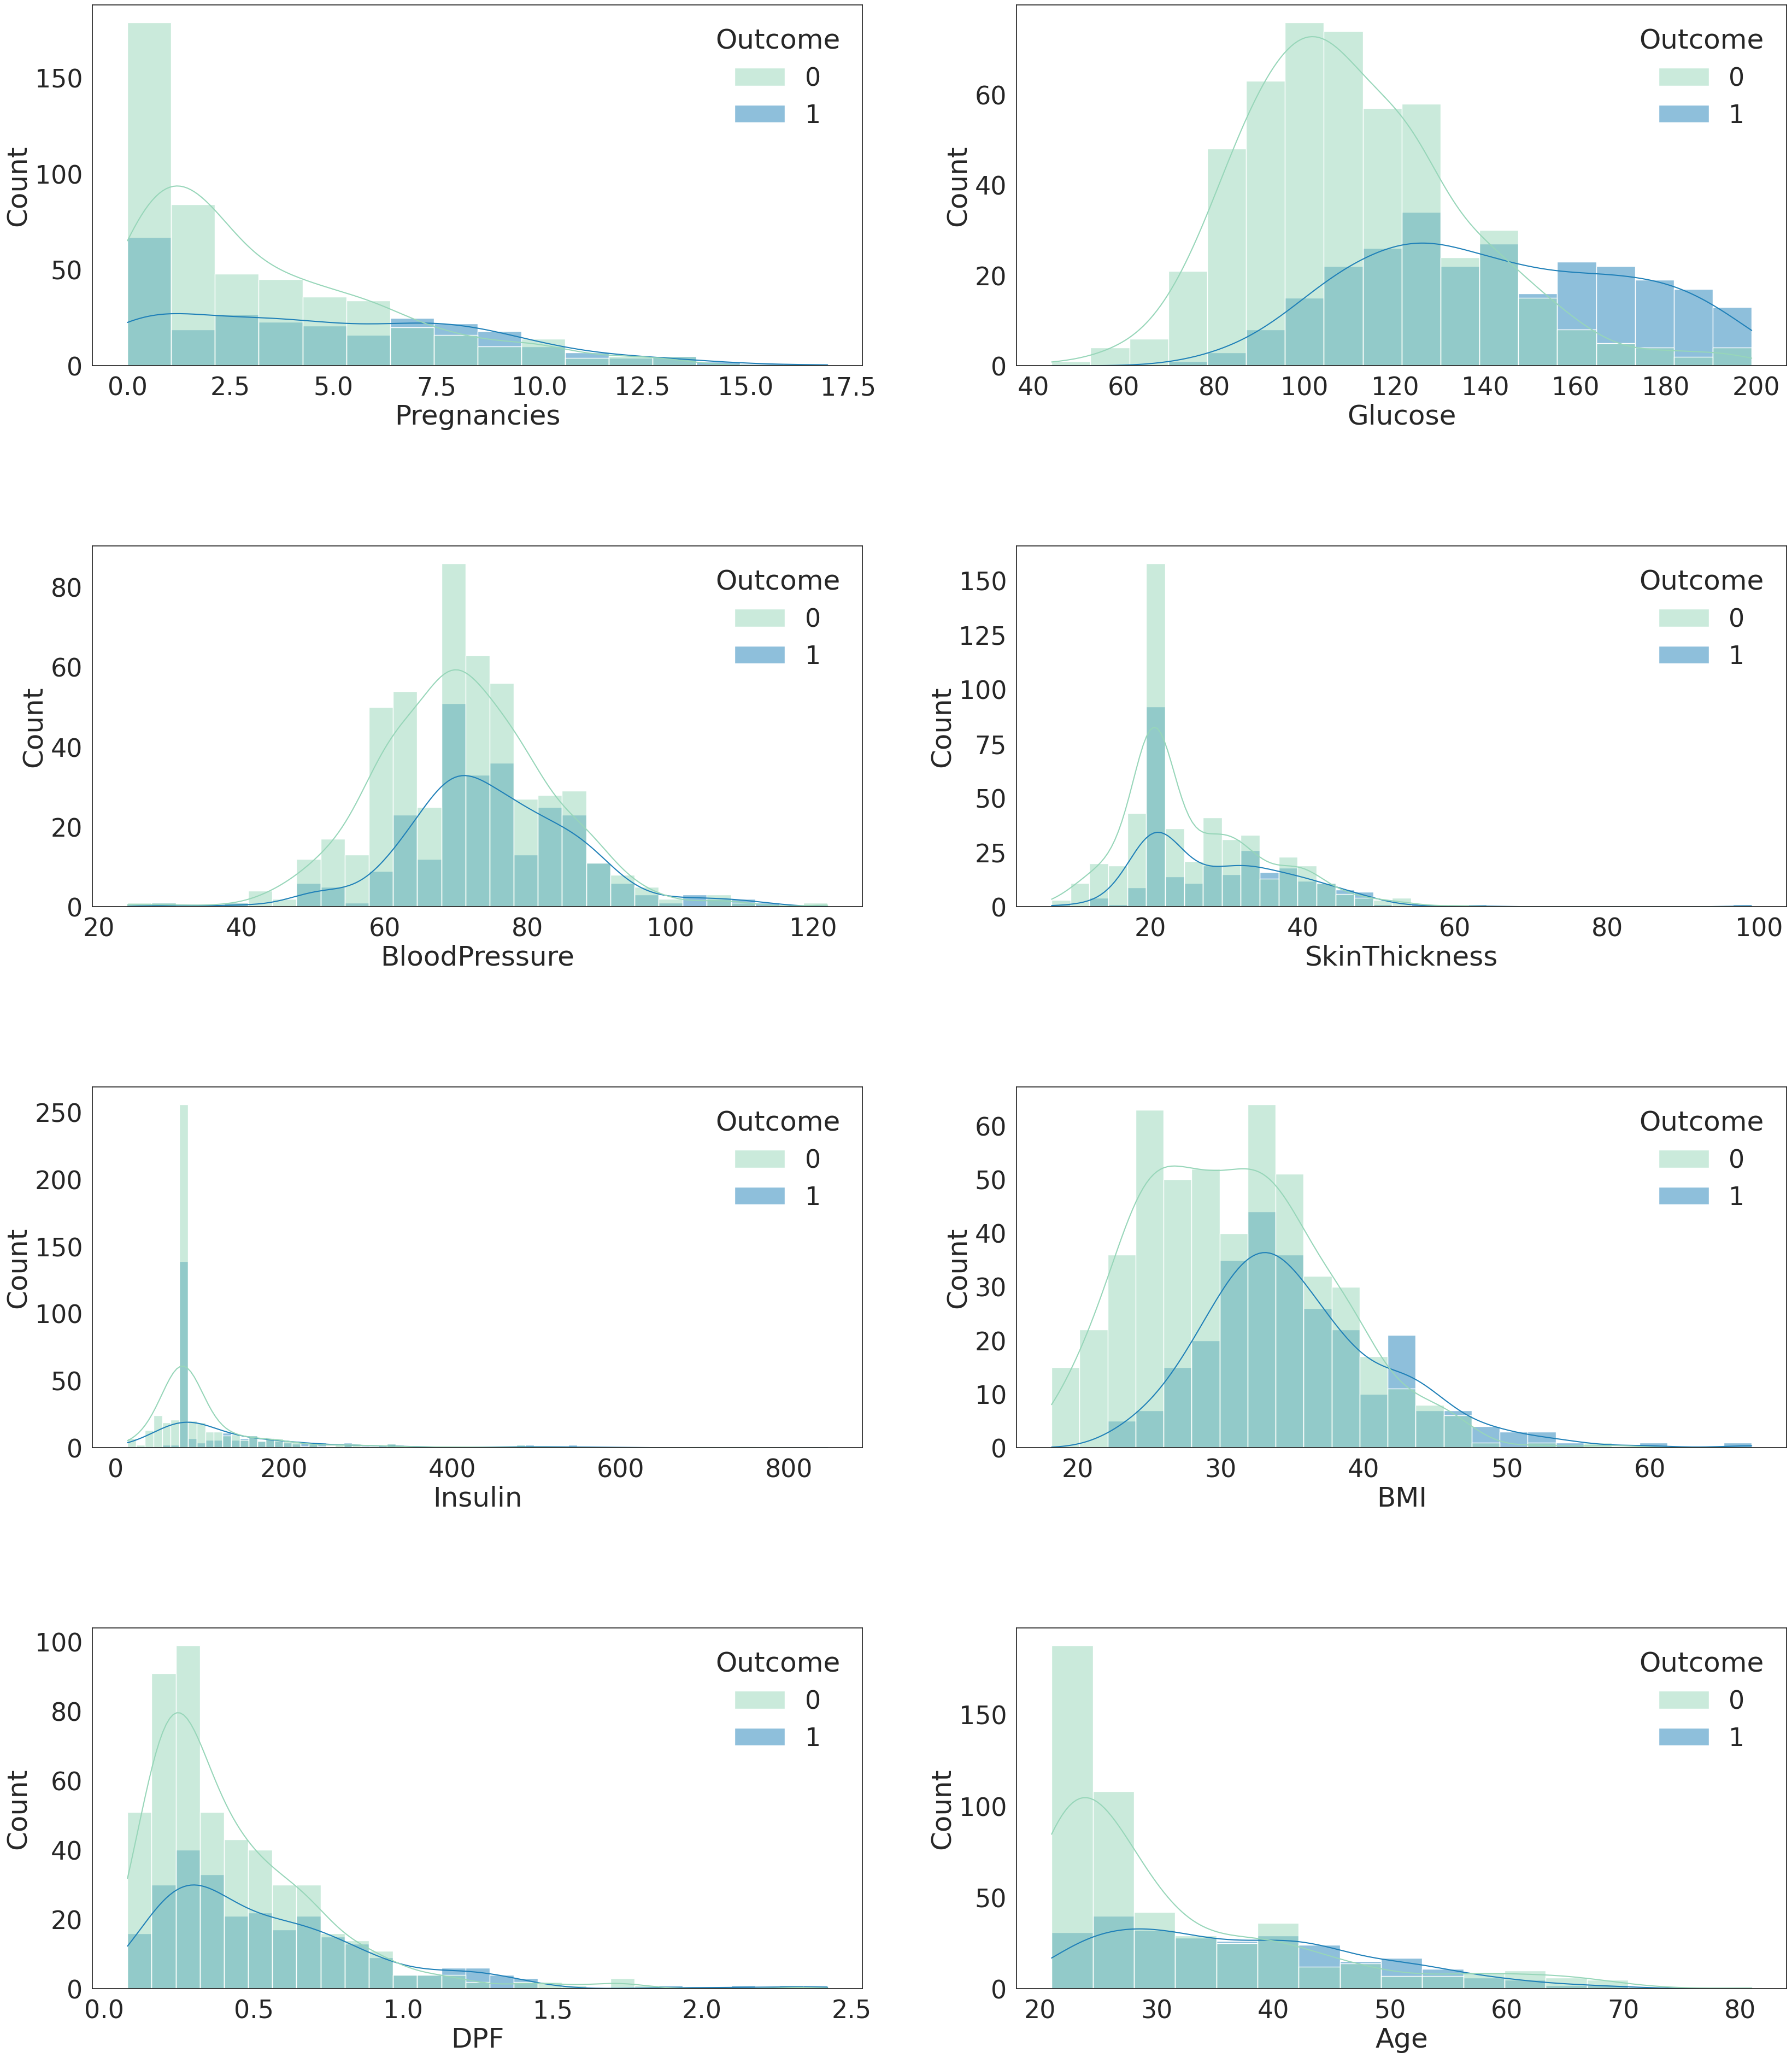

In [157]:
rcParams['figure.figsize'] = 40,60
sns.set(font_scale = 3)
sns.set_style('white')
sns.set_palette('bright')
plt.subplots_adjust(hspace=0.5)
i = 1
for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=df, x=name, hue='Outcome',kde=True,palette='YlGnBu')
    i += 1

## Splitting the Features and the Label

In [158]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

## Splitting the Dataset into Training Set and Test Set

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

## Feature Scaling

In [160]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [161]:
X_train.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   614.000000  614.000000     614.000000     614.000000  614.000000   
mean      3.982085  121.663636      72.576299      26.871098  115.872370   
std       3.430694   29.978939      12.313092       9.812096   91.206647   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000  100.000000      65.000000      20.536458   79.799479   
50%       3.000000  118.000000      72.000000      23.000000   79.799479   
75%       6.000000  139.750000      80.000000      33.000000  122.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI        DPF         Age  
count  614.000000  614.00000  614.000000  
mean    32.366679    0.47785   33.558632  
std      6.772838    0.34200   11.884531  
min     18.200000    0.07800   21.000000  
25%     27.500000    0.24150   24.000000  
50%     31.996289    0.37450   30.000000  
75%     36.300000    0.61800   41.000000  
max     67.100000    2.42000   81.000000

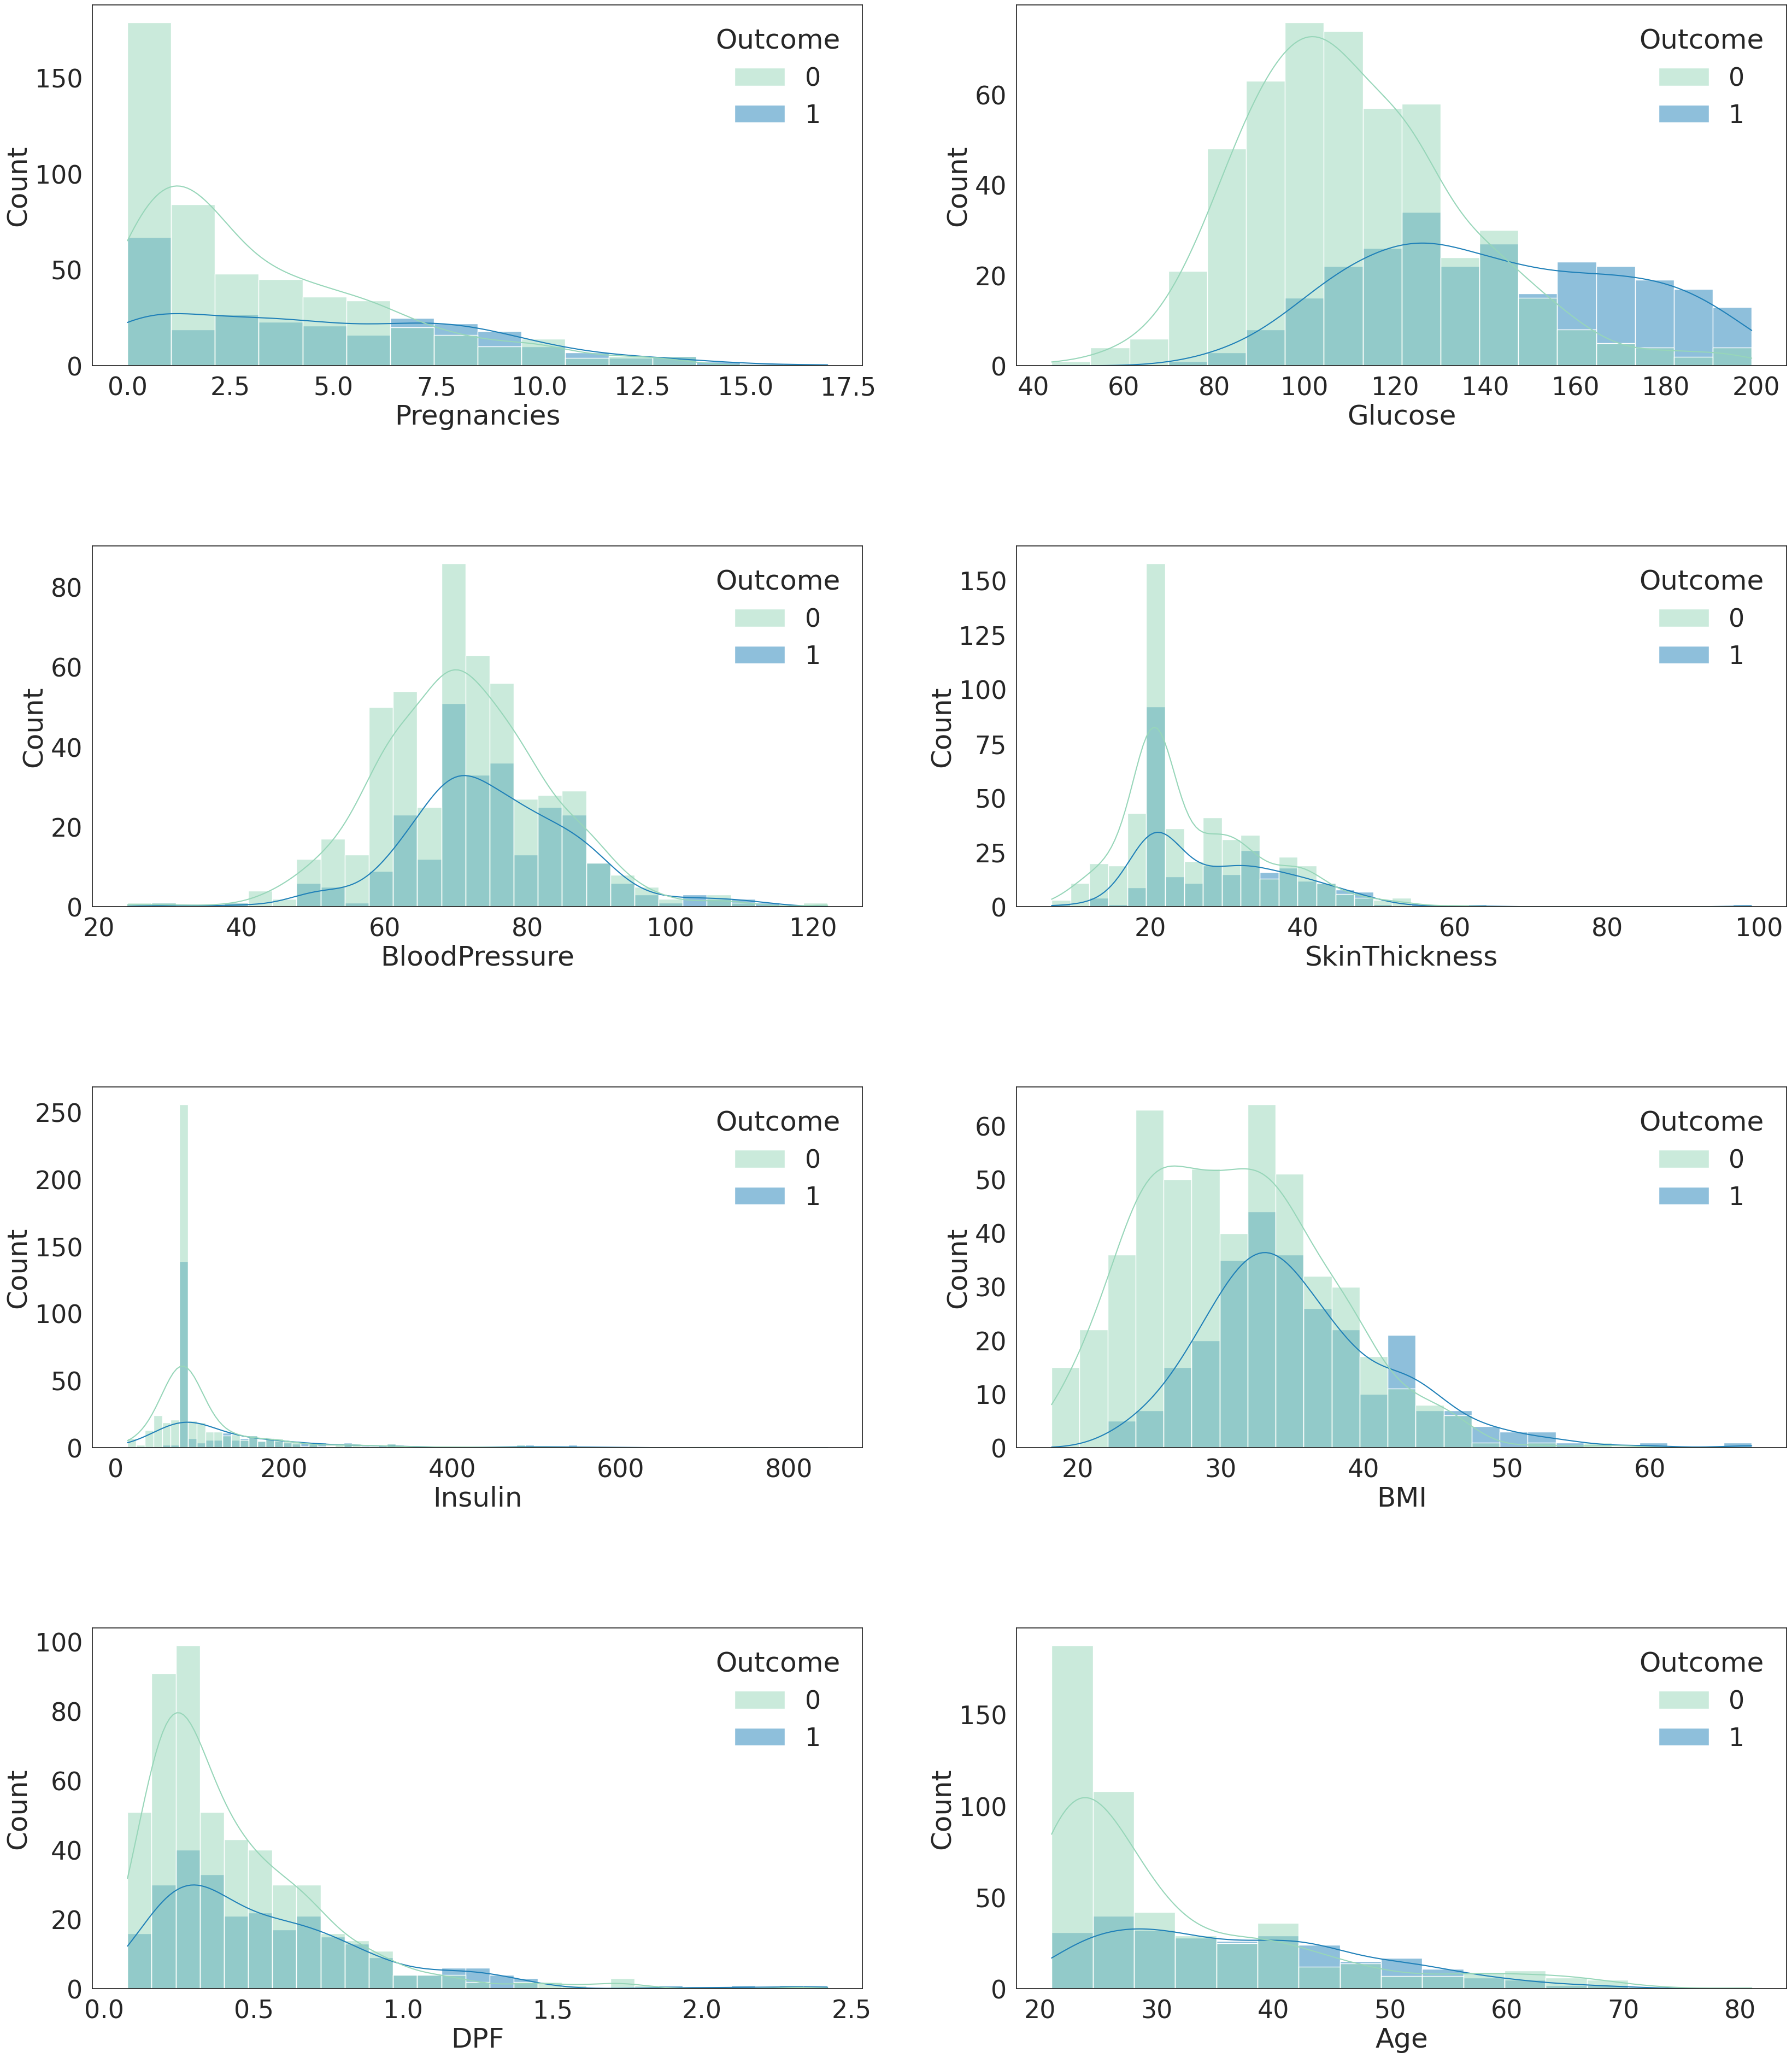

In [162]:
rcParams['figure.figsize'] = 40, 60
sns.set(font_scale=3)
sns.set_style('white')
sns.set_palette('bright')
plt.subplots_adjust(hspace=0.5)
i = 1
for name in feature_names:
    plt.subplot(5, 2, i)
    sns.histplot(data=df, x=name, hue='Outcome', kde=True, palette='YlGnBu')
    i += 1

## Checking Correlation between Features

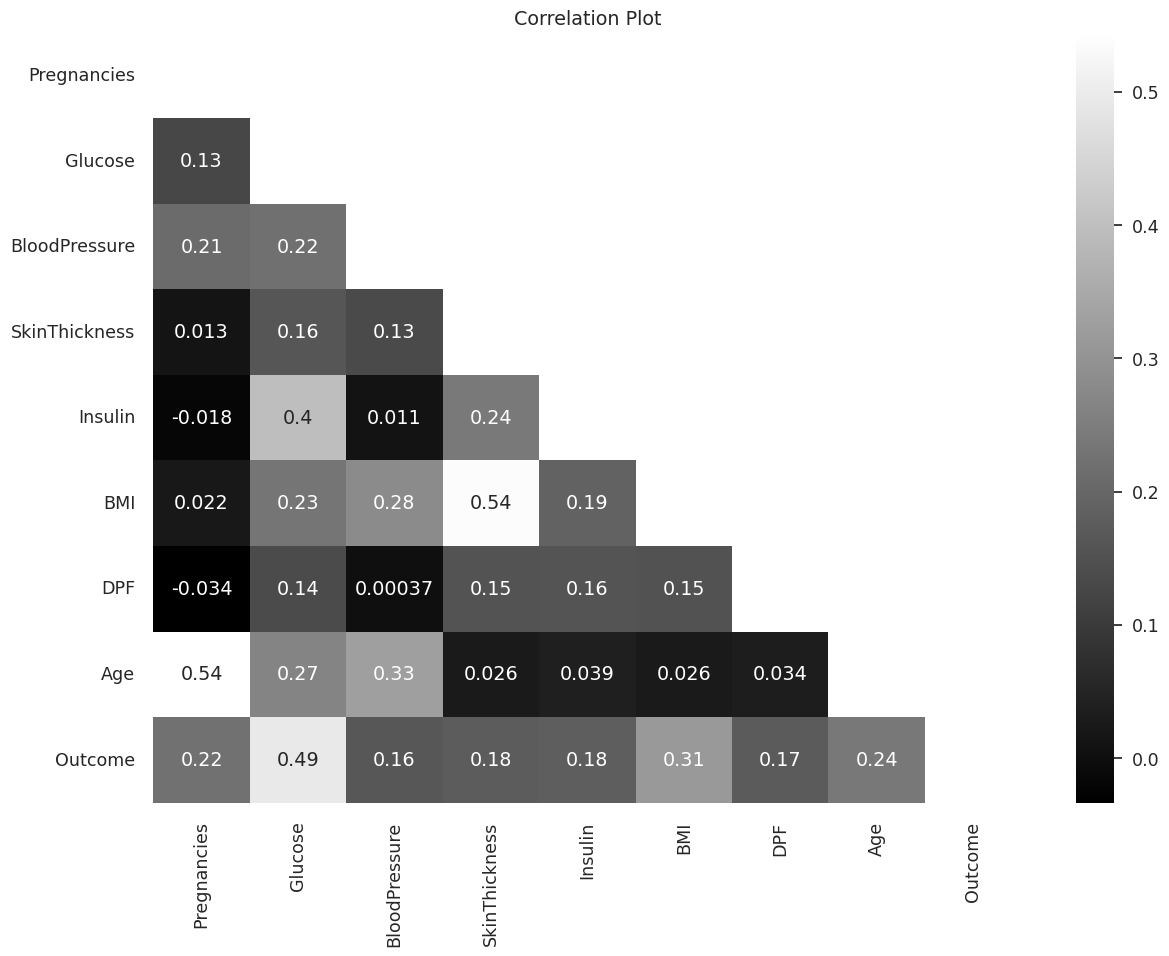

In [163]:
plt.figure(figsize=(14, 10))
sns.set(font_scale=1.15)
sns.set_style('white')
sns.set_palette('bright')
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(),annot=True,cmap='gist_yarg_r', mask=mask, cbar=True)
plt.title('Correlation Plot')
plt.show()

<Figure size 1200x1200 with 0 Axes>

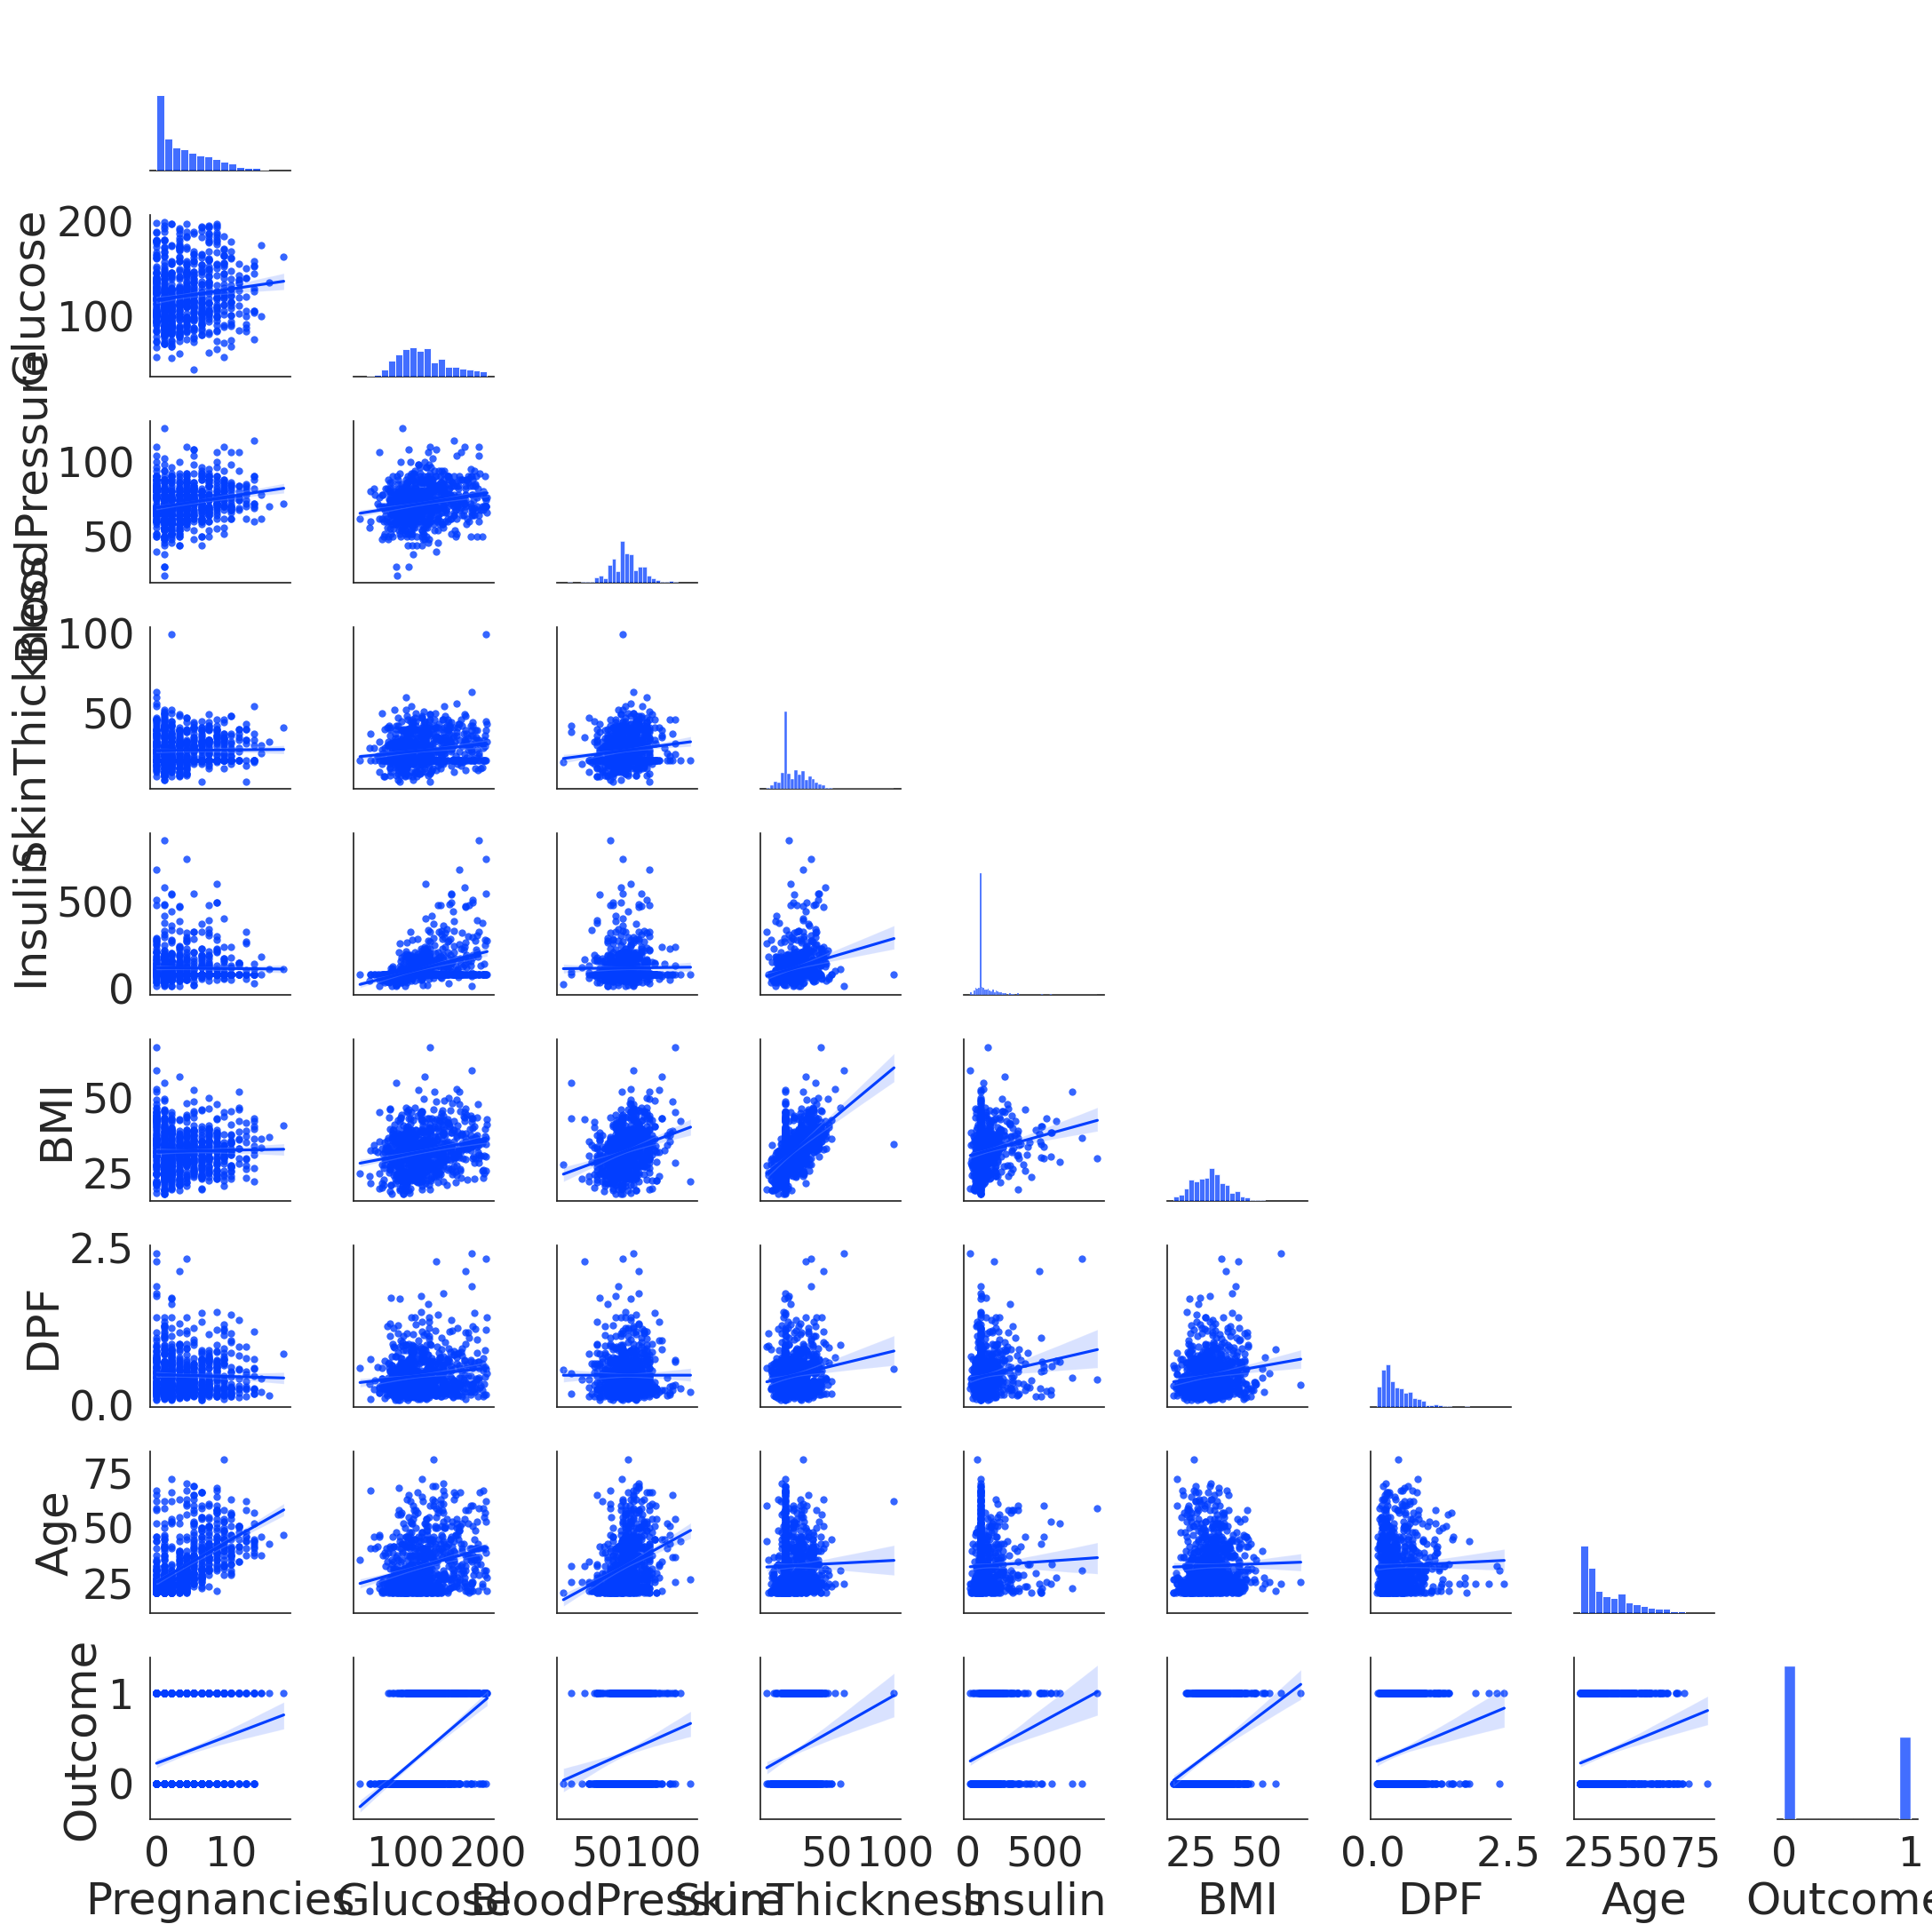

In [164]:
plt.figure(figsize=(12, 12))
sns.set(font_scale=3)
sns.set_style('white')
sns.set_palette('bright')
sns.pairplot(df, kind='reg', corner=True, palette='YlGnBu')
plt.show()

1. Glucose seems to be the most important feature in the training of the model, as it has a high collinearity with Outcome
2. SkinThickness and BMI has a high collinearity, which may be a cause of multicollinearity. It must be checked if there's a problem in the performance results

## Ensemble Models

In [165]:
!pip install pycaret

In [166]:
from pycaret.classification import *

### Setup

In [167]:
clf1 = setup(data=df, target='Outcome', preprocess=False)

### Comparing Models

In [168]:
top5 = compare_models(sort='AUC',
                      n_select=5,
                      exclude=['lightbgm', 'xgboost', 'dummy', 'svm', 'ridge', 'knn', 'dt', 'nb', 'qda'])

Processing:   0%|          | 0/33 [00:00<?, ?it/s]

### Creating Models

In [169]:
rf = create_model('rf')
lr = create_model('lr')
lda = create_model('lda')
gbc = create_model('gbc')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Interpreting Models

In [170]:
interpret_model(rf)

ModuleNotFoundError: ignored

In [ ]:
interpret_model(lr)

In [ ]:
interpret_model(gda)

In [ ]:
interpret_model(lda)

In [ ]:
interpret_model(gbc)

## Tuning Hyperparameters

In [171]:
tuned_rf = tune_model(rf, optimize = 'AUC')
tuned_lr = tune_model(lr, optimize = 'AUC')
tuned_lda = tune_model(lda, optimize = 'AUC')
tuned_gbc = tune_model(gbc, optimize = 'AUC')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


## Stacking

In [172]:
top5[0]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1218, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [173]:
stack_model = stack_models(estimator_list=top5, meta_model=top5[0], optimize='AUC')

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

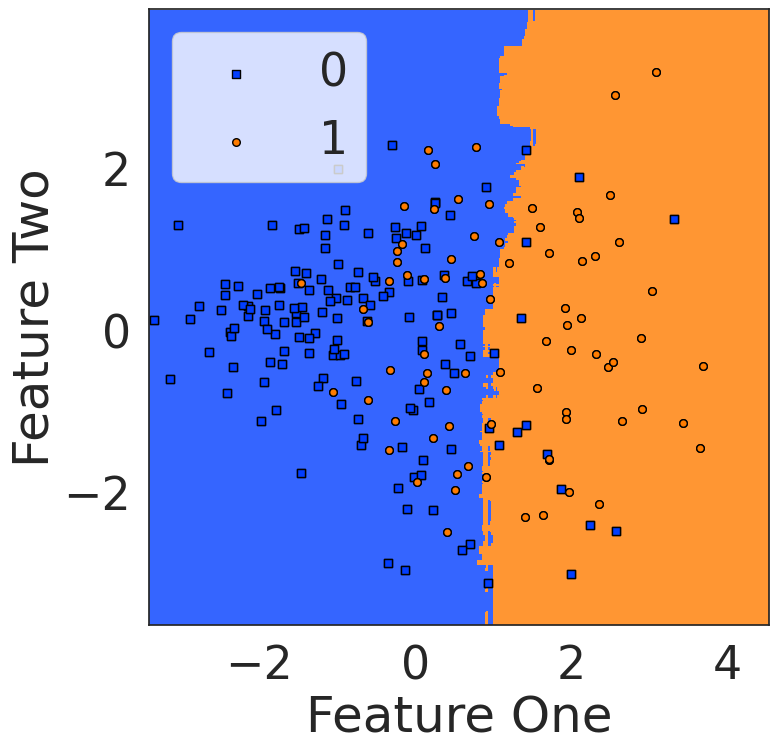

In [174]:
plt.figure(figsize=(8, 8))
plot_model(stack_model, plot='boundary')

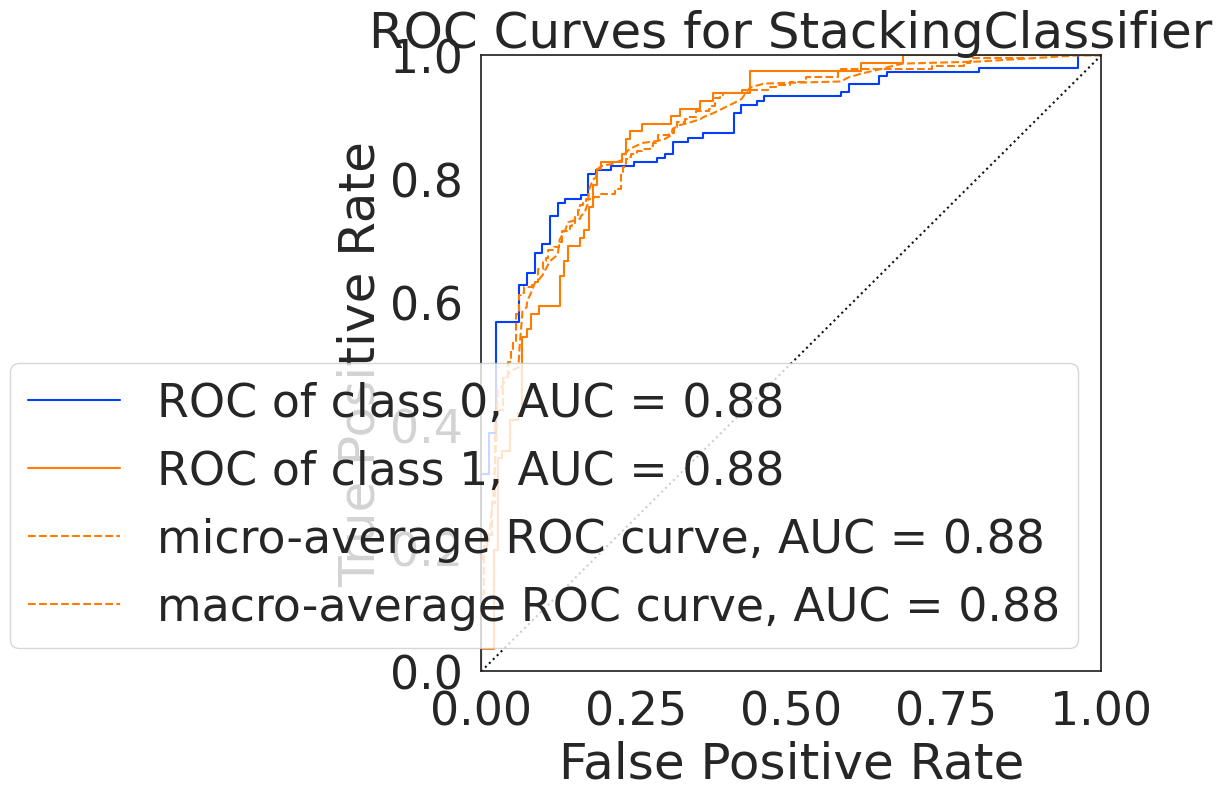

In [175]:
plt.figure(figsize=(8, 8))
plot_model(stack_model, plot='auc')

In [176]:
y_pred = stack_model.predict(X_test_scaled)
y_pred_prob = stack_model.predict_proba(X_test_scaled)[:, 1]

confusion_stack = get_clf_eval(y_test, y_pred, y_pred_prob)

accuracy: 0.6494, precision: 0.0000, recall: 0.0000,    F1: 0.0000, AUC:0.6502


Text(0.5, 1.0, 'Confusion Matrix (Stacking)')

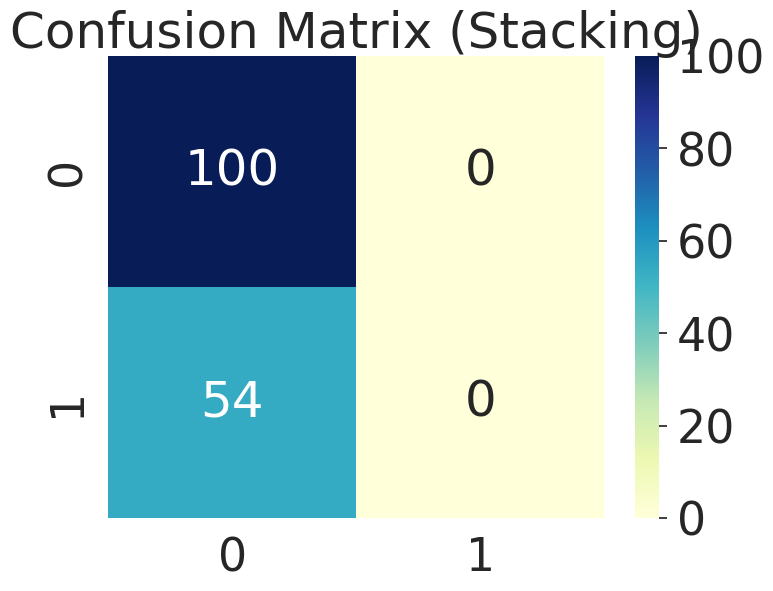

In [177]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_stack, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (Stacking)')

## Soft Voting

In [178]:
blend_soft = blend_models(estimator_list=top5, optimize='AUC', method='soft')

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

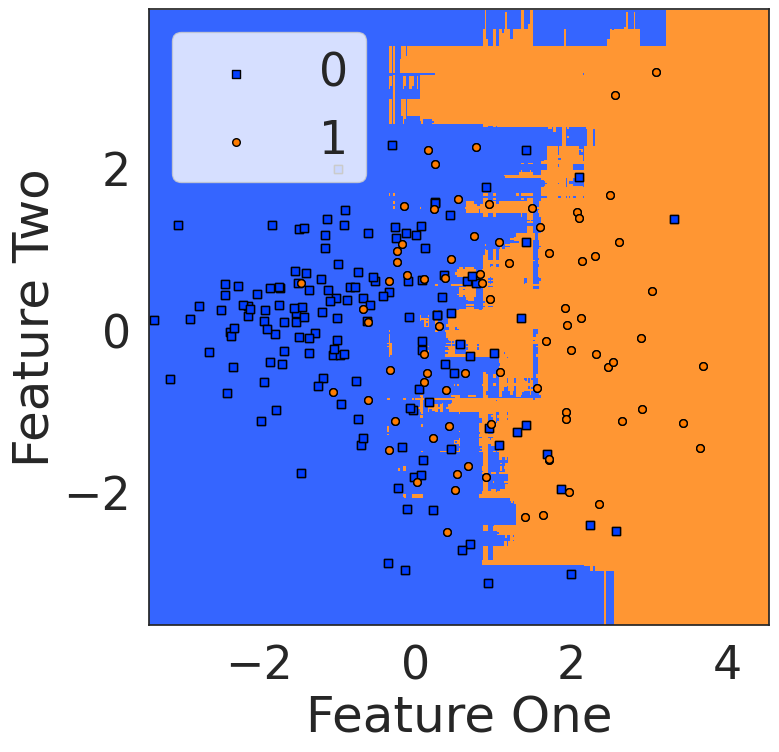

In [179]:
plt.figure(figsize=(8, 8))
plot_model(blend_soft, plot='boundary')

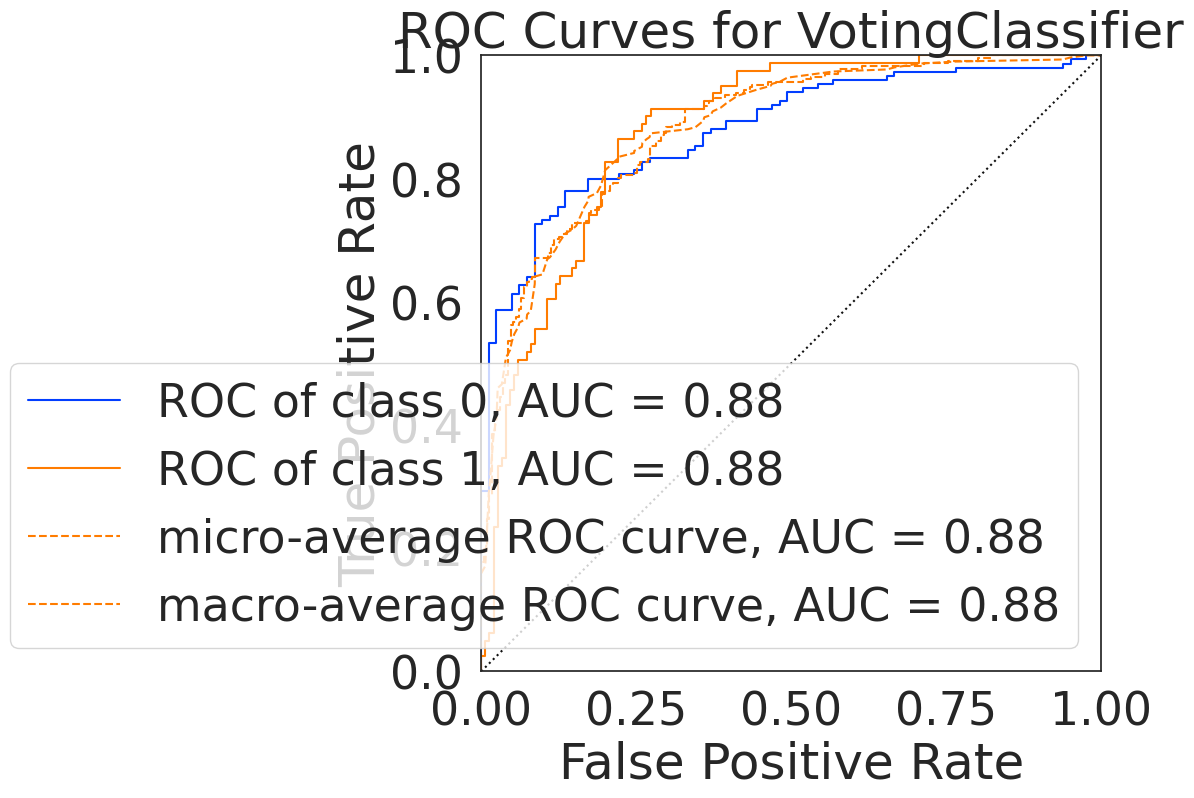

In [180]:
plt.figure(figsize=(8, 8))
plot_model(blend_soft, plot='auc')

In [183]:
y_pred = blend_soft.predict(X_test_scaled)
y_pred_prob = blend_soft.predict_proba(X_test_scaled)[:, 1]

confusion_soft = get_clf_eval(y_test, y_pred, y_pred_prob)

accuracy: 0.6494, precision: 0.0000, recall: 0.0000,    F1: 0.0000, AUC:0.5931


Text(0.5, 1.0, 'Confusion Matrix (Soft Blending)')

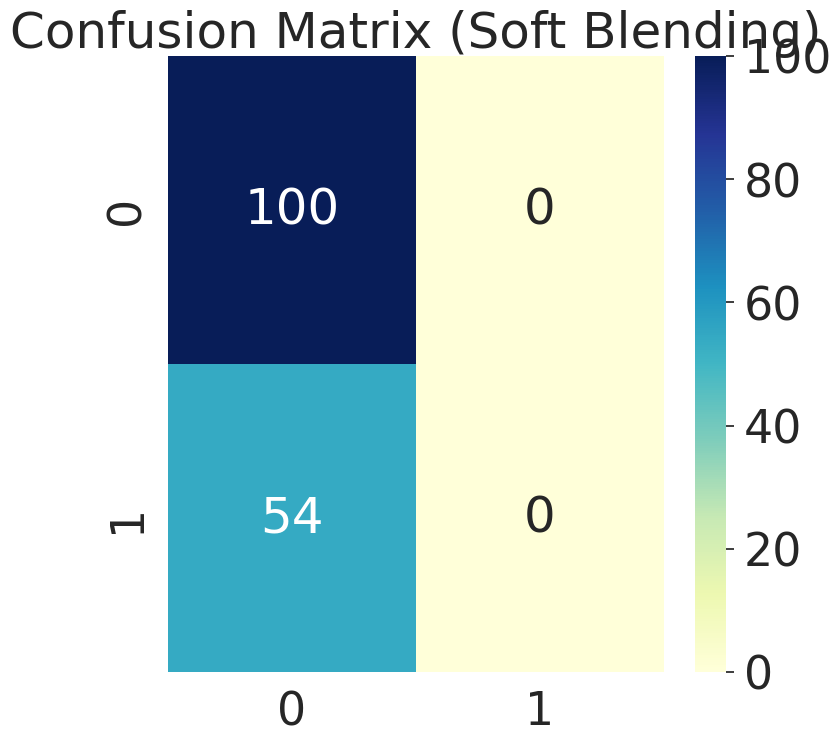

In [187]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(confusion_soft, cmap='YlGnBu', annot=True, fmt='d')
ax.set_title('Confusion Matrix (Soft Blending)')

## Hard Voting

In [189]:
blend_hard = blend_models(estimator_list = top5, optimize = 'AUC',method = 'hard')

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

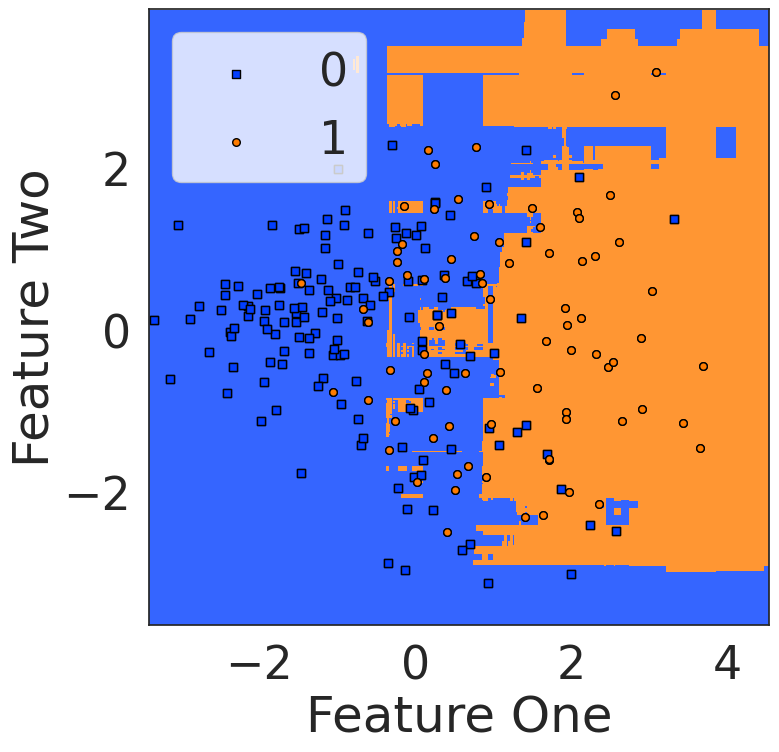

In [190]:
plt.figure(figsize=(8, 8))
plot_model(blend_hard, plot='boundary')

In [192]:
y_pred = blend_hard.predict(X_test)
confusion_hard = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test , y_pred)
precision = precision_score(y_test , y_pred)
recall = recall_score(y_test , y_pred)
f1 = f1_score(y_test,y_pred)
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
F1: {3:.4f}'.format(accuracy, precision, recall, f1))

accuracy: 0.8701, precision: 0.9048, recall: 0.7037,F1: 0.7917


## Calibrating the Final Model

In [193]:
cali_model = calibrate_model(blend_soft)

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

## Finalizing the Model

In [194]:
final_model = finalize_model(cali_model)

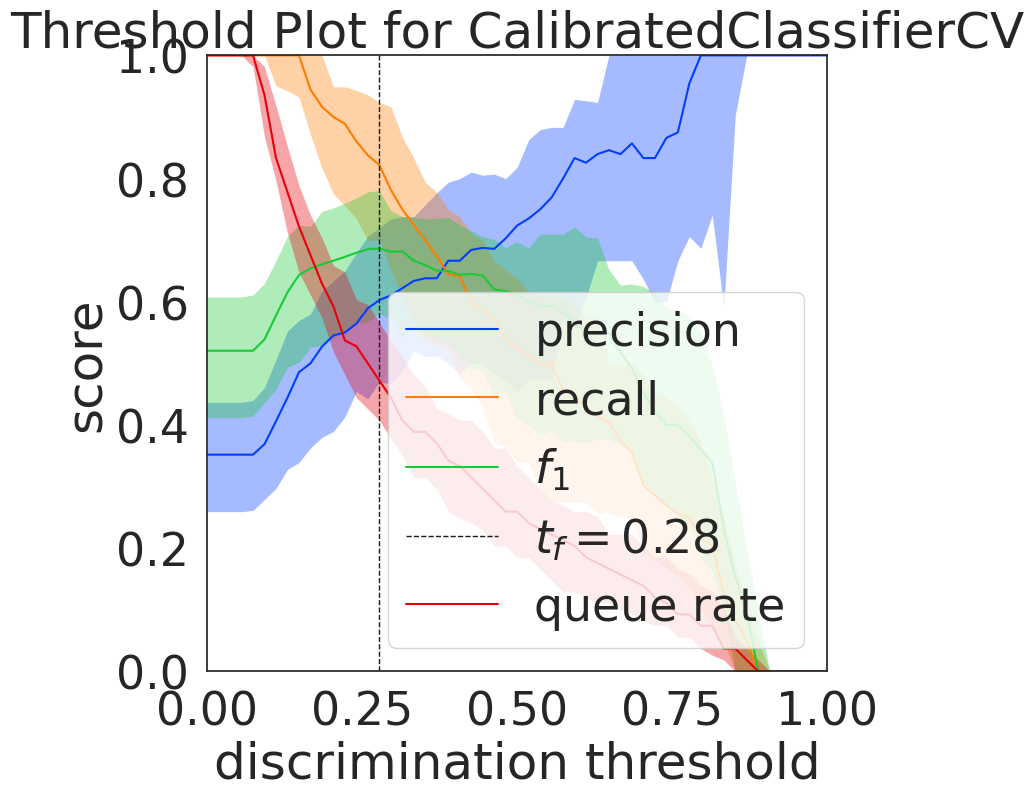

In [195]:
plt.figure(figsize=(8, 8))
plot_model(final_model, plot='threshold')

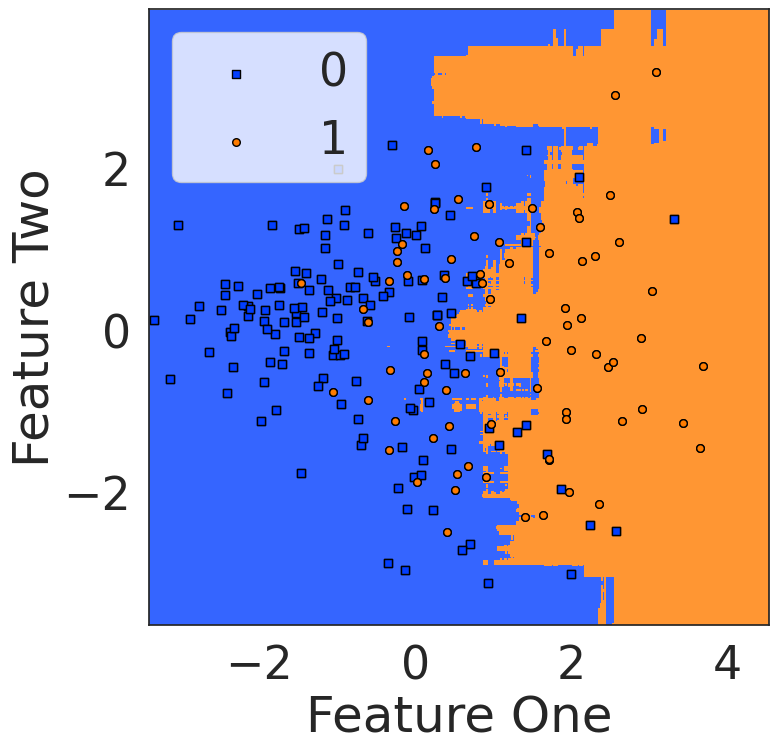

In [196]:
plt.figure(figsize=(8, 8))
plot_model(final_model, plot='boundary')

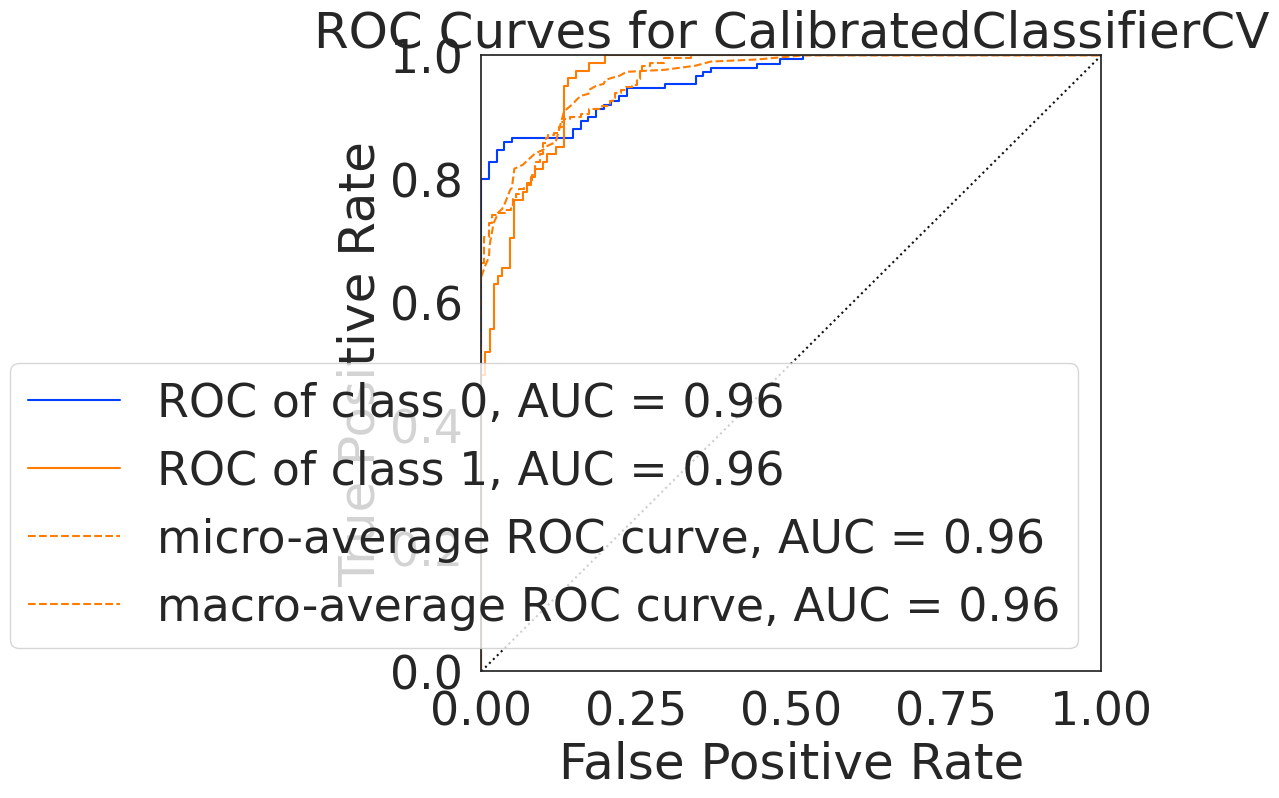

In [197]:
plt.figure(figsize=(8, 8))
plot_model(final_model, plot='auc')

In [201]:
y_pred = blend_hard.predict(X_test)
confusion_final = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test , y_pred)
precision = precision_score(y_test , y_pred)
recall = recall_score(y_test , y_pred)
f1 = f1_score(y_test,y_pred)
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
F1: {3:.4f}'.format(accuracy, precision, recall, f1))

accuracy: 0.8701, precision: 0.9048, recall: 0.7037,F1: 0.7917


Text(0.5, 1.0, 'Confusion Matrix (final_model)')

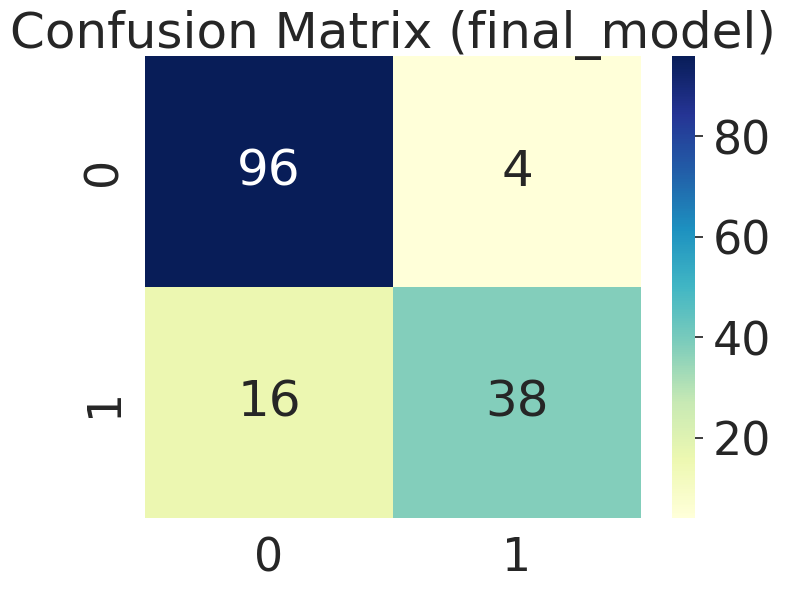

In [202]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_final, cmap = 'YlGnBu', annot = True, fmt='d')
ax.set_title('Confusion Matrix (final_model)')